`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


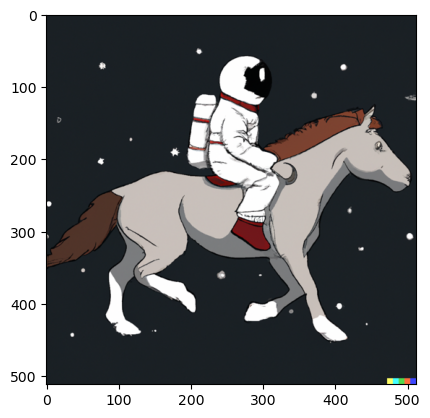

  0%|          | 0/80 [00:00<?, ?it/s]

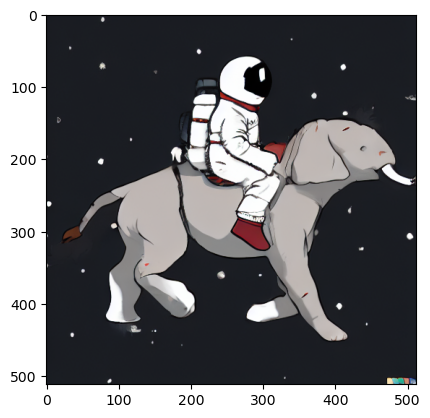

In [5]:
import requests
import torch
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

from diffusers import CycleDiffusionPipeline, DDIMScheduler

# load the pipeline
# make sure you're logged in with `huggingface-cli login`
model_id_or_path = "CompVis/stable-diffusion-v1-4"
scheduler = DDIMScheduler.from_pretrained(model_id_or_path, subfolder="scheduler")
pipe = CycleDiffusionPipeline.from_pretrained(model_id_or_path, scheduler=scheduler).to("cuda")

# let's download an initial image
url = "https://raw.githubusercontent.com/ChenWu98/cycle-diffusion/main/data/dalle2/An%20astronaut%20riding%20a%20horse.png"
response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((512, 512))
init_image.save("horse.png")
plt.imshow(init_image)
plt.show()

# let's specify a prompt
source_prompt = "An astronaut riding a horse"
prompt = "An astronaut riding an elephant"

# call the pipeline
image1 = pipe(
    prompt=prompt,
    source_prompt=source_prompt,
    image=init_image,
    num_inference_steps=100,
    eta=0.1,
    strength=0.8,
    guidance_scale=2,
    source_guidance_scale=1,
).images[0]
plt.imshow(image1)
plt.show()

In [6]:
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    if not isinstance(imgs[0], np.ndarray):
        w, h = imgs[0].size
        grid = Image.new('RGB', size=(cols*w, rows*h))
        grid_w, grid_h = grid.size
        
        for i, img in enumerate(imgs):
            grid.paste(img, box=(i%cols*w, i//cols*h))
    else:
        w, h = Image.fromarray((imgs[0] * 255).astype(np.uint8)).size
        grid = Image.new('RGB', size=(cols*w, rows*h))
        grid_w, grid_h = grid.size
        
        for i, img in enumerate(imgs):
            grid.paste(Image.fromarray((img * 255).astype(np.uint8)), box=(i%cols*w, i//cols*h))   

    return grid

  0%|          | 0/16 [00:00<?, ?it/s]

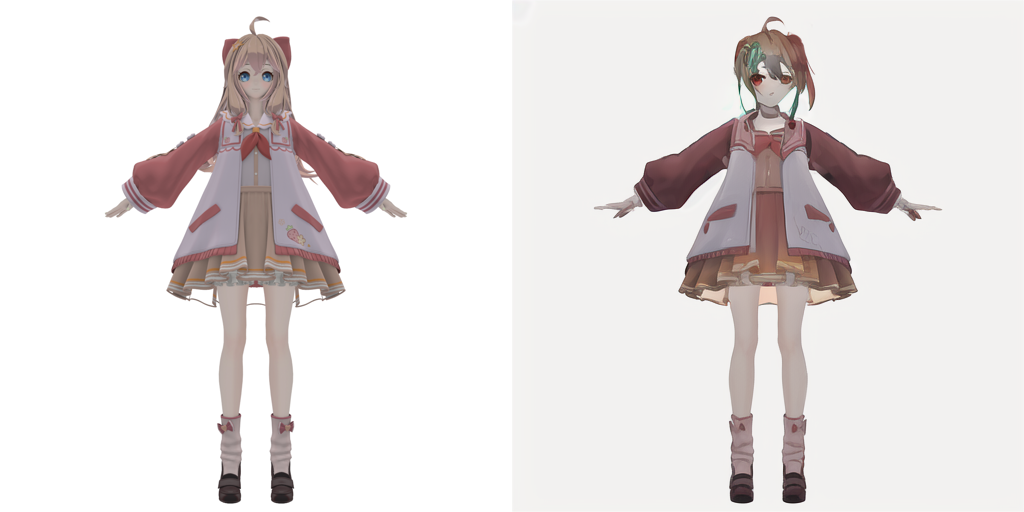

In [16]:
import numpy as np
# load the pipeline
# make sure you're logged in with `huggingface-cli login`
model_id_or_path = "gsdf/Counterfeit-V2.5"
scheduler = DDIMScheduler.from_pretrained(model_id_or_path, subfolder="scheduler")
pipe = CycleDiffusionPipeline.from_pretrained(model_id_or_path, scheduler=scheduler).to("cuda")

# let's download an initial image
init_image = Image.open("/home/ubuntu/AI二次元/0323_jiaran_render/frame_images/frame_images/0001.png").convert("RGB")
init_image = init_image.resize((512, 512))

# let's specify a prompt
source_prompt = "masterpiece,best quality, 1girl, long hair, red hair, solo, dress, blue eyes, looking at viewer"
prompt = "masterpiece,best quality, 1girl, long hair, red hair, solo, dress, red eyes, looking at viewer"

# call the pipeline
image1 = pipe(
    prompt=prompt,
    source_prompt=source_prompt,
    image=init_image,
    num_inference_steps=20,
    eta=0.1,
    strength=0.8,
    guidance_scale=7.5,
    source_guidance_scale=7.5,
).images[0]

grid = image_grid([init_image, image1], rows=1, cols=2)
grid

# Cycle Diffusion Deep Dive

In [21]:
prompt = "masterpiece,best quality, 1girl, long hair, red hair, solo, dress, red eyes, looking at viewer, long sleeves"
sorce_prompt = "masterpiece,best quality, 1girl, long hair, red hair, solo, dress, red eyes, looking at viewer, long sleeves"
image = Image.open("/home/ubuntu/AI二次元/0323_jiaran_render/frame_images/frame_images/0001.png").convert("RGB")
image = init_image.resize((512, 512))
strength = 0.8
num_inference_steps = 50
guidance_scale = 7.5
source_guidance_scale = 7.5
num_images_per_prompt = 1
eta = 0.1
generator = None
prompt_embeds = None
output_type = "pil"
return_dict = True
callback = None
callback_steps = 1
pipe.check_inputs(prompt, strength, callback_steps)
batch_size = 1
device = pipe._execution_device
do_classifier_free_guidance = guidance_scale > 1.0
prompt_embeds = pipe._encode_prompt(
            prompt,
            device,
            num_images_per_prompt,
            do_classifier_free_guidance,
            prompt_embeds=prompt_embeds,
        )